In [28]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'DS-SF-25', 'GlobalLandTemperaturesByCountry.csv'))

In [5]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [31]:
df['ts'] = pd.to_datetime(df.dt)
df['year']=df['ts'].map(lambda x:x.year)
df['month']=df['ts'].map(lambda x:x.month)

In [32]:
df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,ts,year,month
0,1743-11-01,4.384,2.294,Åland,1743-11-01 00:00:00,1743,11
1,1743-12-01,NaN,NaN,Åland,1743-12-01 00:00:00,1743,12
2,1744-01-01,NaN,NaN,Åland,1744-01-01 00:00:00,1744,1
3,1744-02-01,NaN,NaN,Åland,1744-02-01 00:00:00,1744,2
4,1744-03-01,NaN,NaN,Åland,1744-03-01 00:00:00,1744,3
...,...,...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01,2013,5
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01,2013,6
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01,2013,7
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01,2013,8


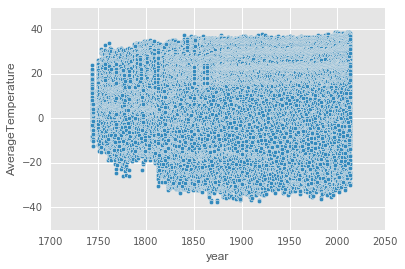

In [33]:
df.plot(kind='scatter',x='year',y='AverageTemperature')

In [56]:
min_year=df['year'].min()
max_year=df['year'].max()
years=range(min_year,max_year+1)

year_temp=[]
canada_temp=[]

for year in years:
    year_data=df[df['year']==year]
    year_temp.append(year_data['AverageTemperature'].mean())
    canada_temp.append(year_data[year_data['Country'] == 'Canada']['AverageTemperature'].mean())

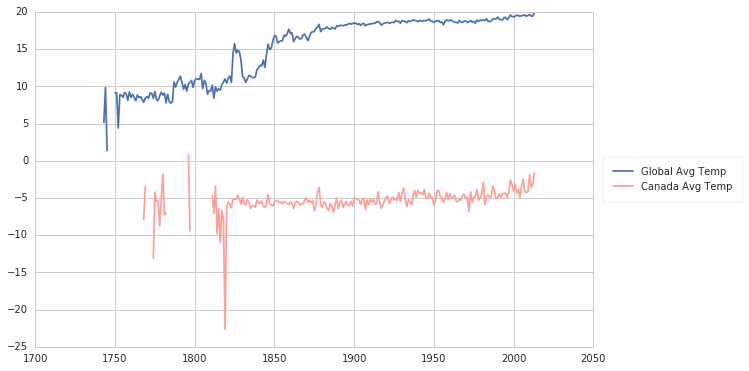

In [64]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax=plt.subplots(figsize=(10,6))

plt.plot(years,year_temp,label='Global Avg Temp')
plt.plot(years,canada_temp,color='r', label='Canada Avg Temp')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), 
                    frameon=True, borderpad=1, borderaxespad=1)

In [65]:
min_year=df['year'].min()
max_year=df['year'].max()
years=range(min_year,max_year+1)

min_month=df['month'].min()
max_month=df['month'].max()
year=range(min_year,max_year+1)

year_temp=[]
canada_temp=[]

for year in years:
    year_data=df[df['year']==year]
    year_temp.append(year_data['AverageTemperature'].mean())
    


In [71]:
data = np.array([np.arange(10)]*20).T
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])